In [13]:
#아두이노에서 측정되는 값을 시리얼 통신을 이용하여 파이썬으로 받아오기.

import serial
import time

serial_port = '/dev/cu.usbmodem113301'   #현재 사용하고 있는 포트 이름
ser = serial.Serial(serial_port, 115200)     #포트와 해당 보드레이트
value = []

check = input()
start_time = time.time()

while(1):
  
  if ser.readable():
    tem = ser.readline()
    val = tem.decode()
    l = list(val.split(','))
    l[-1] = l[-1].rstrip()
    l.append(float(time.time() - start_time))
    print(l)
    value.append(l)

['', 0.00036787986755371094]
['-139.88', '1.86', 0.0009579658508300781]
['-139.34', '3.40', 0.0011208057403564453]
['-138.93', '2.83', 0.0012717247009277344]
['-137.90', '1.31', 0.0014197826385498047]
['-139.89', '3.13', 0.001567840576171875]
['-139.98', '2.53', 0.0017228126525878906]
['-139.26', '3.58', 0.001870870590209961]
['-138.20', '2.03', 0.0019986629486083984]
['-138.06', '2.23', 0.002119779586791992]
['-138.52', '2.11', 0.0022406578063964844]
['-135.97', '2.67', 0.0023686885833740234]
['-138.19', '2.04', 0.002488851547241211]
['-137.87', '2.53', 0.002609729766845703]
['-138.72', '2.51', 0.002730846405029297]
['-137.82', '2.38', 0.0028748512268066406]
['-138.64', '2.28', 0.0029959678649902344]
['-138.25', '2.99', 0.0031266212463378906]
['-137.99', '2.00', 0.0032477378845214844]
['-137.46', '1.67', 0.003387928009033203]
['-137.94', '2.14', 0.003526926040649414]
['-138.41', '3.08', 0.003661632537841797]
['-140.59', '1.91', 0.003803730010986328]
['-138.25', '1.61', 0.0039458274841

KeyboardInterrupt: 

In [12]:
#아두이노에서 받아온 값을 데이터프레임으로 저장.

import pandas as pd

df = pd.DataFrame(value, columns=["Roll", "Pitch", "Time"])
df = df.dropna()
df = df.astype(float)
df['Time'] = df['Time'].apply(lambda x: round(x, 4))

file_name = input()
df.to_csv("../data/" + file_name + ".csv", encoding='utf-8', index=False)

AxesSubplot(0.125,0.11;0.775x0.77)


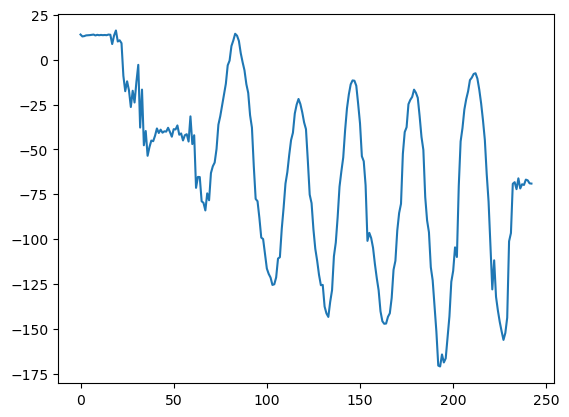

In [9]:
print(df["Roll"].plot())

In [ ]:
#getData로 가져온 df를 다른 이름으로 저장하기.
def setData(df):
    dict = {}
    dict.update({'Roll' : df['Roll'].values.tolist()})
    dict.update({'Pitch' : df['Pitch'].values.tolist()})
    dict.update({'Yaw' : df['Yaw'].values.tolist()})
    dict.update({'Time' : df['Time'].values.tolist()})

    name = input()
    new_dir = db.reference(name)
    new_dir.update(dict)
    